# How different would the selection be if there was no luck?

<p>As a continuation of the analysis, let's find out how many people were 'deserving' of their top 11 position by taking the top 11 based on total and top 11 based on skill, then finding the intersection between these 2 sets of candidates (candidates that wouldve made top 11 even if there was no luck).</p>

# Imports and assumptions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1729)
# There is a mean and std_dev tester below which I used to test these. 
# These values were chosen as they gave top 10 values that were close to the limits of 95 and 5 without exceeding them too often
mean_skill = 47.5
std_skill = 11
mean_luck = 2.5
std_luck=0.6

# Mean and Standard deviation testers

In [2]:
[sorted(np.random.normal(47.5,11,size=18300))[-1:] for i in range(5)]

[[87.4714925620294],
 [86.488989402102],
 [95.51662463230288],
 [91.1075930197654],
 [94.08599045003076]]

In [3]:
[sorted(np.random.normal(2.5,0.6,size=18300))[-1:] for i in range(5)]

[[4.892975021896092],
 [4.746956533254285],
 [4.750529517974606],
 [5.067885433027943],
 [4.8178616009937265]]

 # Test run

In [4]:
skill = np.random.normal(mean_skill, std_skill,size=18300)
luck = np.random.normal(mean_luck, std_luck,size=18300)
candidates = pd.DataFrame({'skill':skill, 'luck':luck})
candidates['total'] = candidates.skill.values + candidates.luck.values

candidates.sort_values(by='total', inplace=True, ascending=False)
print(candidates.head(11))
selected = set(candidates.head(11).index.values.copy())

candidates.sort_values(by='skill', inplace=True, ascending=False)
print(candidates.head(11))
deserving = set(candidates.head(11).index.values.copy())
print("Total top 11: "+str(selected))
print("Skill top 11: "+str(selected))
print("Deserving Candidates: "+str(len(selected.intersection(deserving))))

           skill      luck      total
9904   89.854107  2.130701  91.984808
1331   87.798236  2.545964  90.344200
9881   86.757163  2.096843  88.854006
1502   86.404505  2.441758  88.846263
6120   85.782278  2.209904  87.992182
8986   85.729862  2.170705  87.900566
6245   84.349227  2.858646  87.207872
2337   84.207718  2.581368  86.789086
12945  84.271392  2.133976  86.405368
14311  83.777828  2.452488  86.230316
472    82.422514  3.568704  85.991218
           skill      luck      total
9904   89.854107  2.130701  91.984808
1331   87.798236  2.545964  90.344200
9881   86.757163  2.096843  88.854006
1502   86.404505  2.441758  88.846263
6120   85.782278  2.209904  87.992182
8986   85.729862  2.170705  87.900566
6245   84.349227  2.858646  87.207872
12945  84.271392  2.133976  86.405368
2337   84.207718  2.581368  86.789086
15911  83.988679  1.952935  85.941614
14311  83.777828  2.452488  86.230316
Total top 11: {2337, 6245, 14311, 6120, 9904, 12945, 1331, 472, 9881, 8986, 1502}
Skill 

# Normal distribution

In [5]:
def astro_selection_round_deserving_normal(n_top):
    skill = np.random.normal(mean_skill, std_skill,size=18300)
    luck = np.random.normal(mean_luck, std_luck,size=18300)
    candidates = pd.DataFrame({'skill':skill, 'luck':luck})
    candidates['total'] = candidates.skill.values + candidates.luck.values

    candidates.sort_values(by='total', inplace=True, ascending=False)
    selected = set(candidates.head(n_top).index.values.copy())

    candidates.sort_values(by='skill', inplace=True, ascending=False)
    deserving = set(candidates.head(n_top).index.values.copy())
    return len(selected.intersection(deserving))

In [6]:
thousand_runs = [astro_selection_round_deserving_normal(11) for i in range(1000)]
# Little sanity check
thousand_runs[:5]

[9, 10, 9, 10, 9]

In [7]:
deserving_candidates = np.array(thousand_runs)

Mean amount of deserving candidates: 10.044
Standard deviation of distribution: 0.7321639160734432


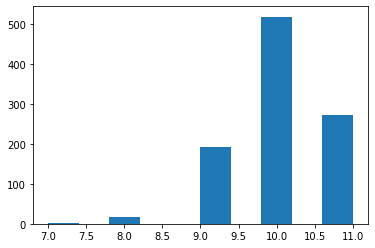

In [8]:
plt.hist(deserving_candidates)
print(f"Mean amount of deserving candidates: {deserving_candidates.mean()}")
print(f"Standard deviation of distribution: {deserving_candidates.std()}")
plt.show()

# Even distribution

Mean amount of deserving candidates: 1.569
Standard deviation of distribution: 1.0877678980370764


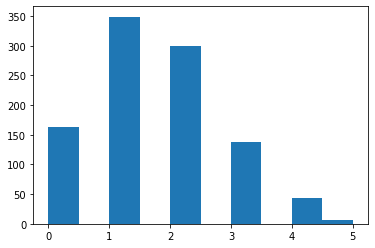

In [9]:
def astro_selection_round_deserving_even(n_top):
    skill = np.random.rand(18300)
    luck = np.random.rand(18300)
    candidates = pd.DataFrame({'skill':skill, 'luck':luck})
    candidates['total'] = candidates.skill.values*95 + candidates.luck.values*5

    candidates.sort_values(by='total', inplace=True, ascending=False)
    selected = set(candidates.head(n_top).index.values.copy())

    candidates.sort_values(by='skill', inplace=True, ascending=False)
    deserving = set(candidates.head(n_top).index.values.copy())
    return len(selected.intersection(deserving))

thousand_runs = [astro_selection_round_deserving_even(11) for i in range(1000)]

deserving_candidates = np.array(thousand_runs)

plt.hist(deserving_candidates)
print(f"Mean amount of deserving candidates: {deserving_candidates.mean()}")
print(f"Standard deviation of distribution: {deserving_candidates.std()}")
plt.show()

# Conclusion
<p> Modeling using the even distribution obtains roughly the same result as the video, where on average, around 1.6 of the 11 candidates are deserving of their place. However, modelling using the normal distribution yields on average 10 of 11 candidates that are deserving of their position.</p>
<p> One might conclude, rather strangely, that an even distribution of skill and luck is more unfair than a normal distribution of skill and luck.</p>